In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import folium
from folium.plugins import HeatMap

In [0]:
#Import Data
data = pd.read_csv('drive/My Drive/crime.csv', engine='python')

In [103]:
data.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


In [0]:
# Dropping the null column
data.drop('SHOOTING',axis=1,inplace=True)

In [9]:
data.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


In [0]:
# Keep only data from complete years (2016, 2017,2018)
data = data.loc[data['YEAR'].isin([2016,2017,2018])]

In [0]:
# Keep only data on UCR Part One offenses
data = data.loc[data['UCR_PART'] == 'Part One']

In [0]:
# Remove unused columns 
data.drop(['INCIDENT_NUMBER','OFFENSE_CODE', 'UCR_PART', 'Location'],axis=1,inplace=True)

In [108]:
data.head()

,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,STREET,Lat,Long
0,Larceny,LARCENY ALL OTHERS,D14,808,2018-09-02 13:00:00,2018,9,Sunday,13,LINCOLN ST,42.357791,-71.139371
6,Auto Theft,AUTO THEFT,B2,330,2018-09-03 21:25:00,2018,9,Monday,21,NORMANDY ST,42.306072,-71.082733
8,Robbery,ROBBERY - STREET,C6,177,2018-09-03 20:48:00,2018,9,Monday,20,MASSACHUSETTS AVE,42.331521,-71.070853
19,Larceny From Motor Vehicle,LARCENY THEFT FROM MV - NON-ACCESSORY,B2,181,2018-09-02 18:00:00,2018,9,Sunday,18,SHIRLEY ST,42.325695,-71.068168
24,Residential Burglary,BURGLARY - RESIDENTIAL - NO FORCE,B2,911,2018-09-03 18:38:00,2018,9,Monday,18,ANNUNCIATION RD,42.335062,-71.093168


In [0]:
# Convert OCCURED_ON_DATE to datetime
data['OCCURRED_ON_DATE'] = pd.to_datetime(data['OCCURRED_ON_DATE'])

In [110]:
data.head()

,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,STREET,Lat,Long
0,Larceny,LARCENY ALL OTHERS,D14,808,2018-09-02 13:00:00,2018,9,Sunday,13,LINCOLN ST,42.357791,-71.139371
6,Auto Theft,AUTO THEFT,B2,330,2018-09-03 21:25:00,2018,9,Monday,21,NORMANDY ST,42.306072,-71.082733
8,Robbery,ROBBERY - STREET,C6,177,2018-09-03 20:48:00,2018,9,Monday,20,MASSACHUSETTS AVE,42.331521,-71.070853
19,Larceny From Motor Vehicle,LARCENY THEFT FROM MV - NON-ACCESSORY,B2,181,2018-09-02 18:00:00,2018,9,Sunday,18,SHIRLEY ST,42.325695,-71.068168
24,Residential Burglary,BURGLARY - RESIDENTIAL - NO FORCE,B2,911,2018-09-03 18:38:00,2018,9,Monday,18,ANNUNCIATION RD,42.335062,-71.093168


In [111]:
# Gives the correlation of data
data.corr()

,YEAR,MONTH,HOUR,Lat,Long
YEAR,1.000000,-0.202717,-0.014478,-0.012244,0.012669
MONTH,-0.202717,1.000000,0.007612,-0.005390,0.005463
HOUR,-0.014478,0.007612,1.000000,-0.000402,0.000128
Lat,-0.012244,-0.005390,-0.000402,1.000000,-0.999813
Long,0.012669,0.005463,0.000128,-0.999813,1.000000


In [112]:
# A few data checks
data.dtypes

OFFENSE_CODE_GROUP             object
OFFENSE_DESCRIPTION            object
DISTRICT                       object
REPORTING_AREA                 object
OCCURRED_ON_DATE       datetime64[ns]
YEAR                            int64
MONTH                           int64
DAY_OF_WEEK                    object
HOUR                            int64
STREET                         object
Lat                           float64
Long                          float64
dtype: object

In [113]:
data.isnull().sum()

OFFENSE_CODE_GROUP        0
OFFENSE_DESCRIPTION       0
DISTRICT                198
REPORTING_AREA            0
OCCURRED_ON_DATE          0
YEAR                      0
MONTH                     0
DAY_OF_WEEK               0
HOUR                      0
STREET                 1166
Lat                    2223
Long                   2223
dtype: int64

In [114]:
data.shape

(49373, 12)

In [115]:
# Shows the cause of maximum crimes 
data['OFFENSE_CODE_GROUP'].value_counts()

Larceny                       20929
Larceny From Motor Vehicle     8734
Aggravated Assault             6421
Residential Burglary           4183
Auto Theft                     3863
Robbery                        3676
Commercial Burglary            1084
Other Burglary                  349
Homicide                        134
Name: OFFENSE_CODE_GROUP, dtype: int64

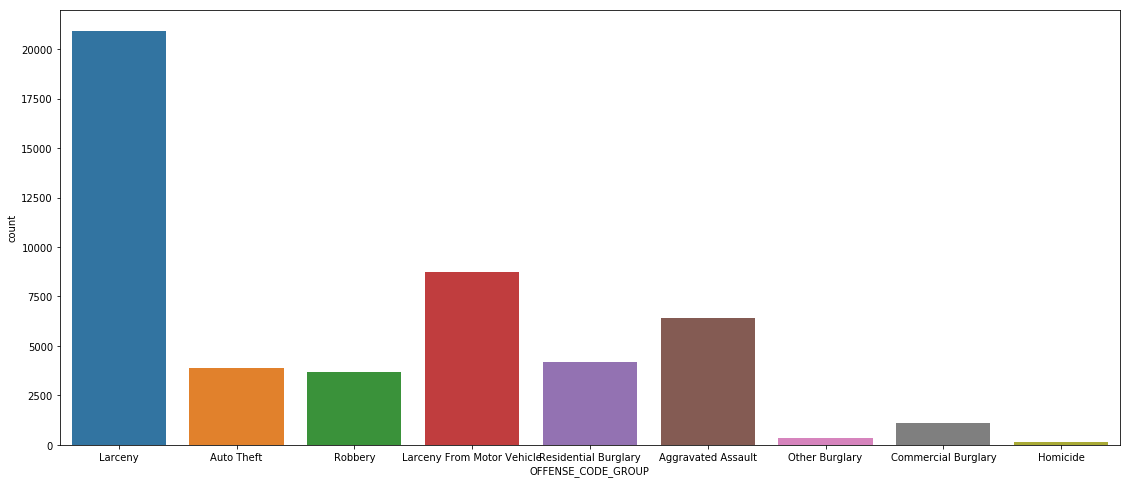

In [117]:
# Countplot for crime types
plt.figure(figsize=(19,8))
sns.countplot(x='OFFENSE_CODE_GROUP',data=data)


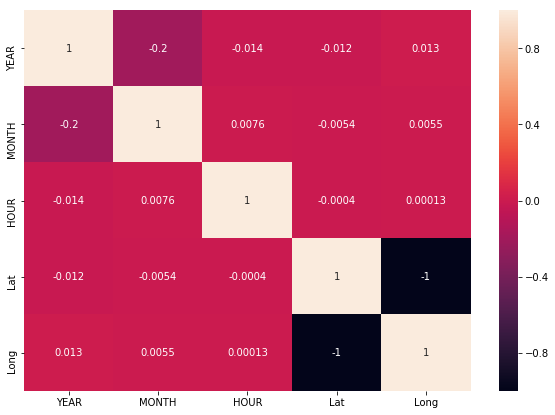

In [118]:
# A heatmap to depict the correlation amongst the data
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(),annot=True)

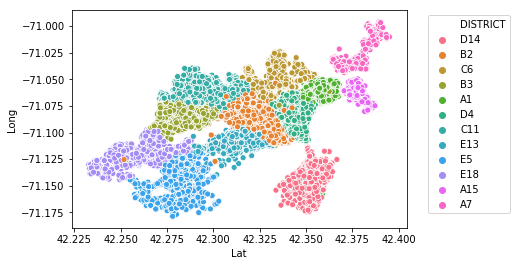

In [119]:
# Replace -1 values in Lat/Long with Nan
data.Lat.replace(-1, None, inplace=True)
data.Long.replace(-1, None, inplace=True)

# Plot districts (with the no of crimes) using scatter plot 
sns.scatterplot(x='Lat', y ='Long',data=data, hue= 'DISTRICT')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

In [120]:
# Shows maximum crimes in a particular district 
data['DISTRICT'].value_counts()

D4     9908
B2     6999
A1     6957
C11    5467
B3     3970
C6     3647
D14    3118
E13    2846
E18    2083
A7     1715
E5     1438
A15    1027
Name: DISTRICT, dtype: int64

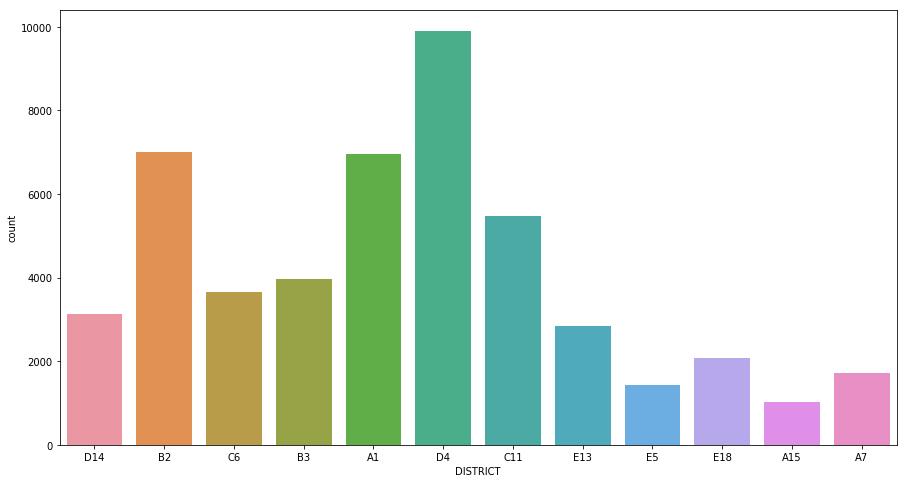

In [121]:
# A counplot showing the no of crimes in district 
plt.figure(figsize=(15,8))
sns.countplot(x='DISTRICT',data=data)

In [122]:
# most affected street
data['STREET'].value_counts()

WASHINGTON ST          2550
BOYLSTON ST            2212
BLUE HILL AVE          1136
TREMONT ST              932
HUNTINGTON AVE          891
MASSACHUSETTS AVE       875
NEWBURY ST              862
DORCHESTER AVE          806
COMMONWEALTH AVE        740
HARRISON AVE            671
CENTRE ST               586
RIVER ST                471
COLUMBIA RD             454
ALLSTATE RD             421
COLUMBUS AVE            393
DUDLEY ST               378
HYDE PARK AVE           367
WARREN ST               357
SUMMER ST               341
BEACON ST               339
CHARLES ST              276
CAMBRIDGE ST            274
BOWDOIN ST              266
AMERICAN LEGION HWY     266
BORDER ST               247
ADAMS ST                241
WINTER ST               228
GENEVA AVE              225
STUART ST               205
W BROADWAY              194
                       ... 
HENRY ST                  1
LEDGEBROOK RD             1
HARVARD SQ                1
COURTHOUSE WAY            1
EVERETT CT          

In [123]:
# Total no of streets in our data
data['STREET'].nunique()

3012

In [0]:
#WASHINGTON STREET IS MOST AFFECTED AMONG ALL THE STREETS

Text(0, 0.5, 'COUNT')

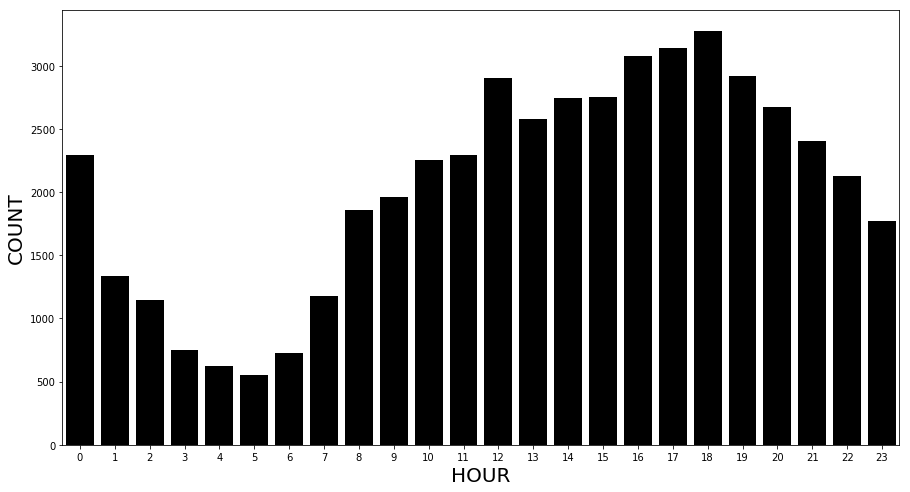

In [125]:
# Crimes by hour of the day
plt.figure(figsize=(15,8))
sns.countplot(x='HOUR',data=data,color='black')
plt.xlabel('HOUR',fontsize=20)
plt.ylabel('COUNT',fontsize=20)

Text(0, 0.5, 'COUNT')

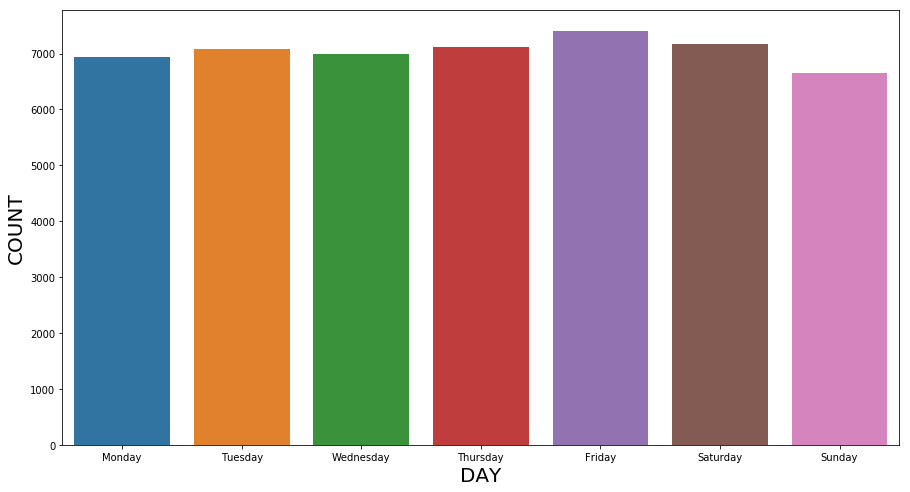

In [126]:
# Crimes by day of the week

# Convert DAY_OF_WEEK to an ordered category
data.DAY_OF_WEEK = pd.Categorical(data.DAY_OF_WEEK, 
              categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],
              ordered=True)
plt.figure(figsize=(15,8))
sns.countplot(x='DAY_OF_WEEK',data=data)
plt.xlabel('DAY',fontsize=20)
plt.ylabel('COUNT',fontsize=20)

Text(0, 0.5, 'COUNT')

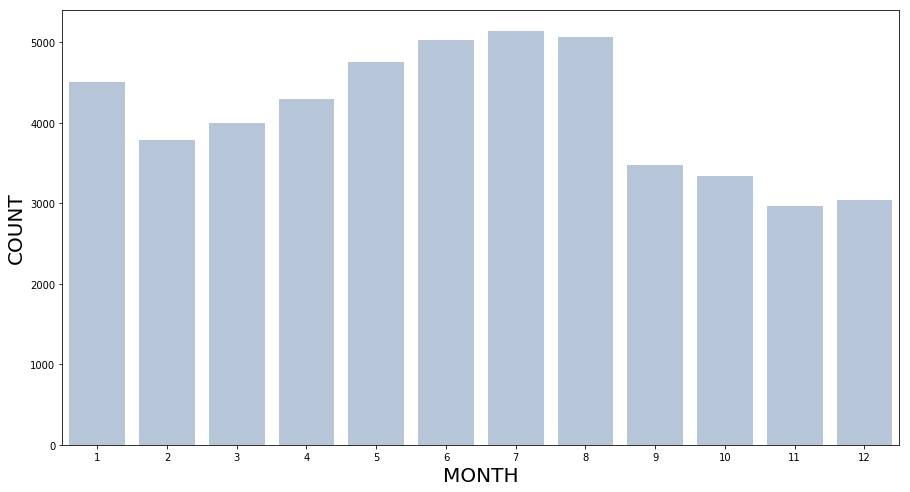

In [127]:
# Crimes by month of year
plt.figure(figsize=(15,8))
sns.countplot(x='MONTH',data=data,color='lightsteelblue')
plt.xlabel('MONTH',fontsize=20)
plt.ylabel('COUNT',fontsize=20)

In [129]:
data['MONTH'].value_counts()

7     5144
8     5061
6     5022
5     4752
1     4510
4     4296
3     3993
2     3790
9     3469
10    3333
12    3040
11    2963
Name: MONTH, dtype: int64

Text(0, 0.5, 'COUNT')

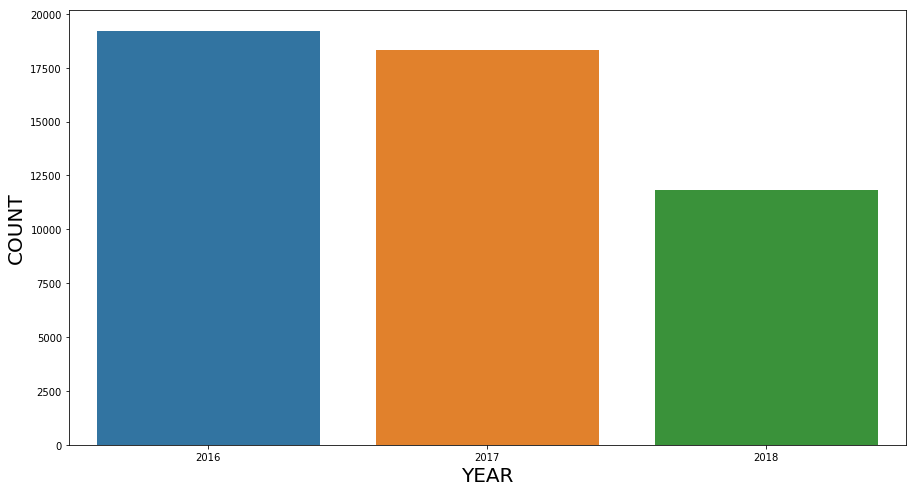

In [130]:
#Crimes in the year 2016,2017,2018
plt.figure(figsize=(15,8))
sns.countplot(x='YEAR',data=data)
plt.xlabel('YEAR',fontsize=20)
plt.ylabel('COUNT',fontsize=20)

In [133]:
# Create basic Folium crime map
crime_map = folium.Map(location=[42.3125,-71.0875], 
                       tiles = "Stamen Toner",
                      zoom_start = 11)

# Add data for heatmp 
data_heatmap = data[data.YEAR == 2016]
data_heatmap = data[['Lat','Long']]
data_heatmap = data.dropna(axis=0, subset=['Lat','Long'])
data_heatmap = [[row['Lat'],row['Long']] for index, row in data_heatmap.iterrows()]
HeatMap(data_heatmap, radius=10).add_to(crime_map)

# Plot!
crime_map

In [0]:
Conclusions
In summary, this dataset shows:

1.Larceny is by far the most common type of serious crime.
2.Serious crimes are most likely to occur in the afternoon and evening.
3.Serious crimes are most likely to occur on Friday and least likely to occur on Sunday.
4.Serious crimes are most likely to occur in the summer and early fall, and least likely to occur in the winter (with the exeption of January, which has a crime rate more similar to the summer).
5.There is no obvious connection between major holidays and crime rates.
6.Serious crimes are most common in the city center, especially districts A1 and D4.
7.The serious crime rates decreased in the year 2018 as compared to the years in 2016 and 2017. 